<center>
<h1>Houses prices Challenge Starting Kit</h1>
<br>
<div style="background:#FFFFAA"> This code SHOULD BE tested with <br>
Python 2.7.13 | Anaconda 4.3.1 (https://anaconda.org/)<br></div>
Paris Saclay Center for Data Science (CDS)

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

# Introduction

Houses prices is a small standard Regression problem, the data set was token from a kaggle competition, formatted in the AutoML format.

In [1]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
import seaborn as sns; sns.set()

# Step 1: Exploratory data analysis

## Sample data loading

We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.


In [2]:
datadir = 'sample_data/'             
basename = 'houseprice'
!ls $datadir*

sample_data/houseprice_feat.name      sample_data/houseprice_train.data
sample_data/houseprice_label.name     sample_data/houseprice_train.solution
sample_data/houseprice_test.data      sample_data/houseprice_valid.data
sample_data/houseprice_test.solution  sample_data/houseprice_valid.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [3]:
# We read data as Panda data frames
feat_name = pd.read_csv(datadir+basename + '_feat.name', header=None)
label_name = pd.read_csv(datadir+basename + '_label.name', header=None)
X = pd.read_csv(datadir+basename + '_train.data', sep=' ', names = np.ravel(feat_name))
Y = pd.read_csv(datadir+ basename + '_train.solution', sep=' ', names = np.ravel(label_name))
[patnum, featnum] = X.shape
[patnum2, classnum] = Y.shape
assert(patnum==patnum2)
print ('Number of examples = %d' % patnum)
print ('Number of features = %d' % featnum)
print ('Number of variables to predict = %d' % classnum)

Number of examples = 100
Number of features = 18
Number of variables to predict = 1


In [4]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000
mean,3.270000,1.800000,2109.030000,14252.370000,1.530000,0.020000,0.400000,3.360000,7.740000,1842.120000,266.910000,1970.800000,120.080000,98086.130000,47.0,-121.930000,2015.720000,13273.380000
std,0.802207,0.778499,965.116306,35109.687847,0.610597,0.140705,1.015038,0.659354,1.299728,825.823975,421.738899,32.413365,477.691284,53.207551,0.0,0.256432,624.246132,33179.528865
min,2.000000,0.000000,590.000000,987.000000,1.000000,0.000000,0.000000,1.000000,4.000000,590.000000,0.000000,1905.000000,0.000000,98001.000000,47.0,-122.000000,1030.000000,1230.000000
25%,3.000000,1.000000,1417.500000,4658.250000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1947.000000,0.000000,98041.500000,47.0,-122.000000,1530.000000,5206.750000
50%,3.000000,2.000000,1940.000000,7054.000000,1.000000,0.000000,0.000000,3.000000,8.000000,1625.000000,0.000000,1975.500000,0.000000,98097.000000,47.0,-122.000000,1930.000000,7200.000000
75%,4.000000,2.000000,2567.500000,11995.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2295.000000,465.000000,2000.000000,0.000000,98122.000000,47.0,-122.000000,2322.500000,9450.000000
max,5.000000,4.000000,6330.000000,308080.000000,3.000000,1.000000,4.000000,5.000000,13.000000,4900.000000,1510.000000,2014.000000,2013.000000,98199.000000,47.0,-121.000000,3890.000000,247856.000000


In [5]:
Y.head()

,price
0,699000
1,285000
2,480000
3,359900
4,847000


In [6]:
# Here we add the target values as a last column, this is convenient to use seaborn
numerical_target = Y['price'] 

XY = X.assign(price=numerical_target.values) 


## Data distribution

Let's first display the distribution of the target column (price) using a boxplot.
<div style="background:#FFFFAA"> Isabelle: this section needs some work, the graphics are kind of boring </div>

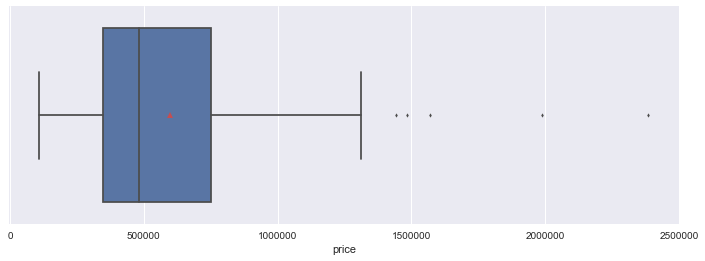

In [7]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = XY, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()



we can also use a histogram for our target variable

(array([  5.,  13.,  18.,  12.,   9.,   8.,   8.,   6.,   9.,   1.,   2.,
          0.,   3.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.]),
 array([  110000.,   201000.,   292000.,   383000.,   474000.,   565000.,
          656000.,   747000.,   838000.,   929000.,  1020000.,  1111000.,
         1202000.,  1293000.,  1384000.,  1475000.,  1566000.,  1657000.,
         1748000.,  1839000.,  1930000.,  2021000.,  2112000.,  2203000.,
         2294000.,  2385000.]),
 <a list of 25 Patch objects>)

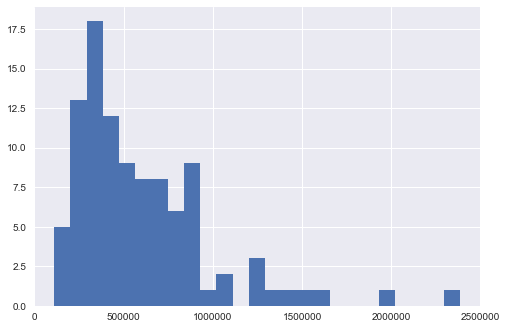

In [8]:
plt.hist(XY.price, bins = 25)

Immediately, we notice that the distribution is skewed towards cheaper homes. To make the distribution more symmetric, we can use its logarithm:

(array([  1.,   0.,   1.,   0.,   3.,   4.,   5.,   4.,   5.,  12.,   7.,
          8.,   6.,   4.,   7.,  10.,   9.,   3.,   2.,   3.,   2.,   2.,
          0.,   1.,   1.]),
 array([ 11.60823564,  11.73129461,  11.85435357,  11.97741253,
         12.10047149,  12.22353045,  12.34658941,  12.46964838,
         12.59270734,  12.7157663 ,  12.83882526,  12.96188422,
         13.08494318,  13.20800214,  13.33106111,  13.45412007,
         13.57717903,  13.70023799,  13.82329695,  13.94635591,
         14.06941487,  14.19247384,  14.3155328 ,  14.43859176,
         14.56165072,  14.68470968]),
 <a list of 25 Patch objects>)

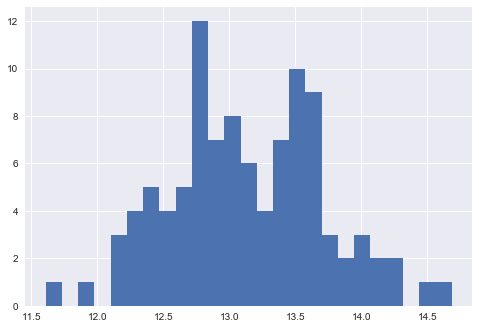

In [9]:
plt.hist(np.log(XY.price), bins = 25)

## Pairplot Visualisation

We can also create some Seaborn pairplots for the features ('price','sqft_living','grade','sqft_above','sqft_living15','bedrooms','bathrooms') to get a feel for how the various features are distributed vis-a-vis the price. This is useful for choosing which model you will use for training and prediction.

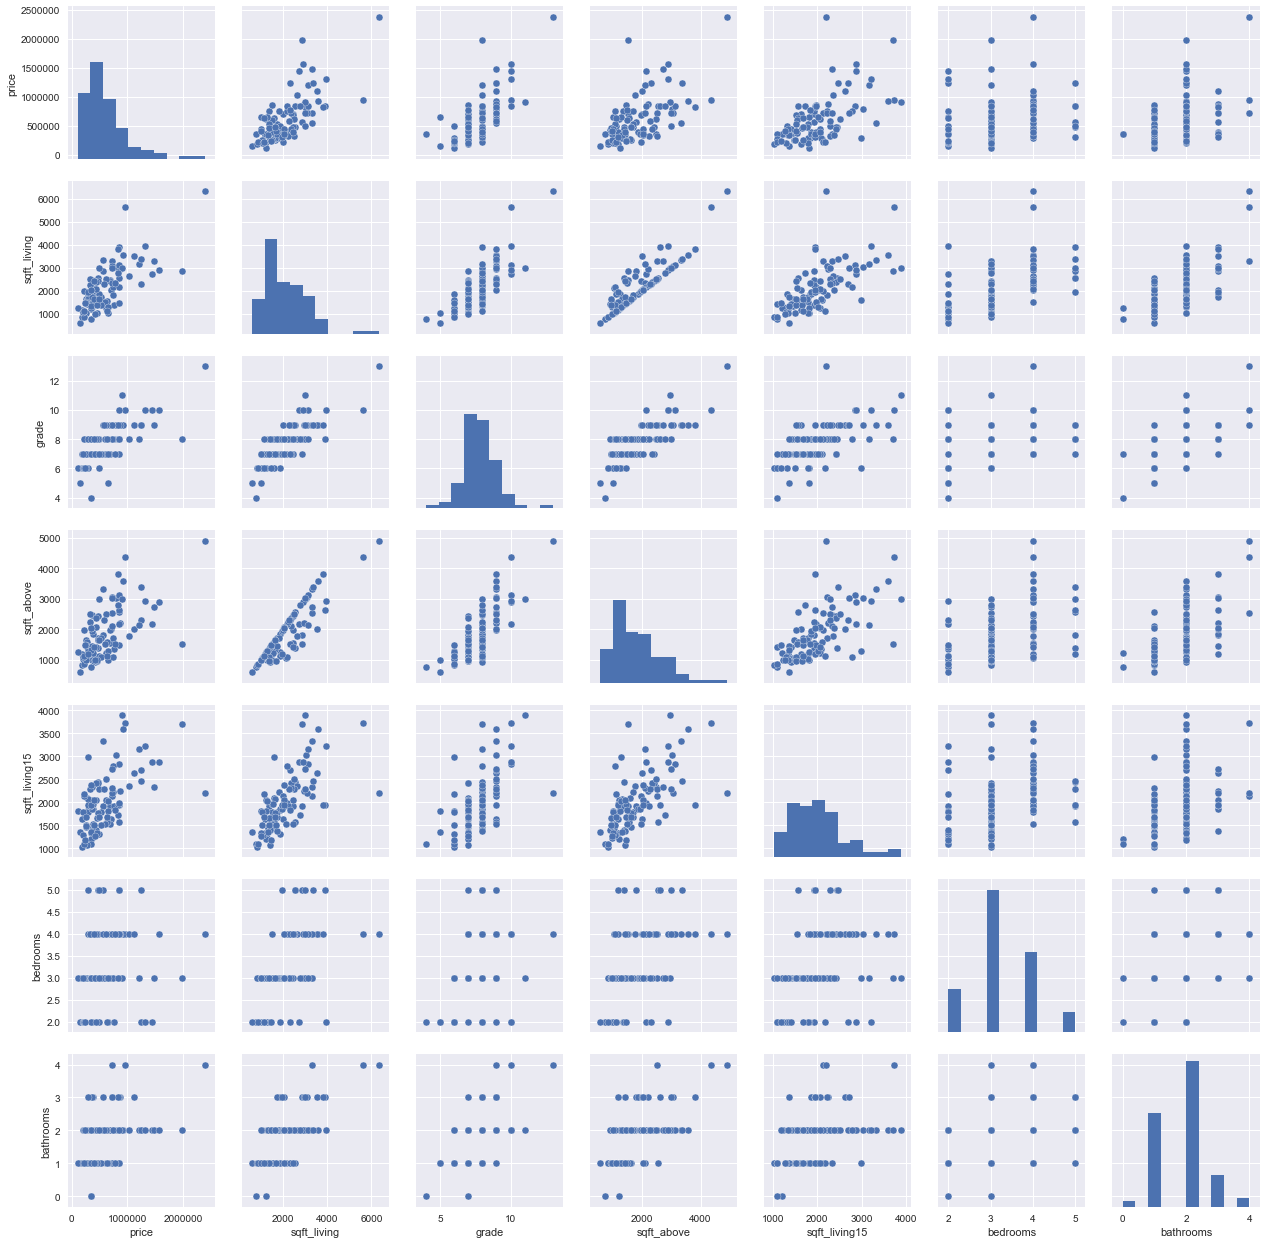

In [10]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bedrooms','bathrooms']
sns.pairplot(XY[cols], size = 2.5,  palette='afmhot')
plt.show();

# Step 2: Building a predictive model

## Load from your pre-processed dataset

In order to train your predictive model you should first prepare clean data which have been pre-processed. At the starting stage you can load data in the sample_data/directory. Be aware that this is only small number of data, you should later replace them with your own dataset.

In [11]:
X_train_table = pd.read_csv(datadir+basename + '_train.data', sep=' ', names = np.ravel(feat_name))
Y_train_table = pd.read_csv(datadir+ basename + '_train.solution', sep=' ', names = np.ravel(label_name))

X_validation_table=pd.read_csv(datadir+basename + '_valid.data', sep=' ', names = np.ravel(feat_name))
Y_validation_table=pd.read_csv(datadir+ basename + '_valid.solution', sep=' ', names = np.ravel(label_name))

X_test_table=pd.read_csv(datadir+basename + '_test.data', sep=' ', names = np.ravel(feat_name))
Y_test_table= pd.read_csv(datadir+ basename + '_test.solution', sep=' ', names = np.ravel(label_name))

You should convert dataframe into numpy array for training model

In [12]:
X_train=X_train_table.values
Y_train=Y_train_table.values
X_validation=X_validation_table.values
Y_validation=Y_validation_table.values
X_test=X_test_table.values
Y_test=Y_test_table.values

## Training a predictive model

We provide an example of predictive model (for classification or regression) in the sample_code_submission/ directory. It is a basic decision tree regressor. Replace it with your own model. 
You must supply at least 4 methods:
- fit: trains the model.
- predict: uses the model to perform predictions.
- save: saves the model.
- load: reloads the model.

In [13]:
from model import model
??model 

Create an instance of the model, you can reload your already trained model. If you don't have any you will train a new one.

In [14]:
M = model()   
reload_model=0                       # Change to 1 to reload an already trained model

trained_model_name = model_dir + basename
if reload_model:    
    M = M.load(trained_model_name)   

Train and run your predictive model. If you saved have an aldeady trained model saved in sample_code_submission, the evaluation script will reload it and not retrain, just test. So if you mean to retrain your model, you should delete 

In [15]:
if not(M.is_trained):
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(X_train) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(X_validation)
Y_hat_test = M.predict(X_test)

FIT: dim(X)= [100, 18]
FIT: dim(y)= [100, 1]
PREDICT: dim(X)= [100, 18]
PREDICT: dim(y)= [100, 1]
PREDICT: dim(X)= [50, 18]
PREDICT: dim(y)= [50, 1]
PREDICT: dim(X)= [50, 18]
PREDICT: dim(y)= [50, 1]


In [16]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + basename


np.savetxt(result_name + '_valid.predict', Y_hat_valid, fmt='%d')
np.savetxt(result_name + '_test.predict', Y_hat_test, fmt='%d')
!ls $result_name*

sample_result_submission/houseprice_test.predict
sample_result_submission/houseprice_train.predict
sample_result_submission/houseprice_valid.predict


## scoring the result

**load challenge metric**

The metric chosen for your challenge is identified in the "metric.txt" file found in the scoring_function/ directory. We use here the r2_score_ which is the most commonly used statistics and allows us to understand the percentage of variance in the target variable explained by the model. You are able to pick up any metric in scoring_function/libscores. You may also change that in the "metric.txt" file to e.g. 

In [17]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
import libscores, my_metric
try:
    scoring_function = getattr(libscores, metric_name)
except:
    scoring_function = getattr(my_metric, metric_name)
print ('Using scoring metric:', metric_name)
??scoring_function

Using scoring metric: my_r2_score


**Training performance**

The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [18]:
Y_hat_valid

array([  498500.,  1482500.,   851000.,   410988.,   338500.,   193000.,
         338500.,   870000.,  1110000.,   851000.,  1482500.,   355000.,
         359900.,  1570000.,  1110000.,   912000.,   187500.,   439000.,
         346950.,   330000.,   625000.,   285000.,   345000.,   460000.,
         110000.,   825000.,   285000.,   259500.,   355000.,  1110000.,
         498500.,   193000.,   450000.,   193000.,   724950.,   525000.,
         851000.,   565000.,   625000.,   631500.,   525000.,   482000.,
         928990.,   300000.,   658000.,   285000.,   295500.,   425000.,
         928990.,   268000.])

In [19]:
print ('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_validation, Y_hat_valid.ravel()))
print ('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_validation.ravel(), Y_validation.ravel()))

Training score for the my_r2_score metric = 0.3395
Ideal score for the my_r2_score metric = 1.0000


<div style="background:#FFFFAA"> Isabelle: you could also compare with other metrics </div>
No surprise that we have got non-sense score since we only use a small dataset. Try to replace with your own model and use a larger dataset to see how it does.

## Cross-Validation

Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development.
<div style="background:#FFFFAA"> Isabelle: I changed that </div>

In [20]:
from sklearn.model_selection import KFold
from numpy import zeros, mean
# 3-fold cross-validation
n = 3
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

FIT: dim(X)= [66, 18]
FIT: dim(y)= [66, 1]
PREDICT: dim(X)= [34, 18]
PREDICT: dim(y)= [34, 1]
Fold 1 example metric =  0.16160178428
FIT: dim(X)= [67, 18]
FIT: dim(y)= [67, 1]
PREDICT: dim(X)= [33, 18]
PREDICT: dim(y)= [33, 1]
Fold 2 example metric =  0.41805906824
FIT: dim(X)= [67, 18]
FIT: dim(y)= [67, 1]
PREDICT: dim(X)= [33, 18]
PREDICT: dim(y)= [33, 1]
Fold 3 example metric =  0.315717516988
Average score =  0.298459456503


# Step 3: Making a submission



## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.